# Implementing a perceptron learning algorithm in Python


In [2]:
import numpy as np

In [14]:
# Take an objected-oriented approach to define the perceptron interface as a Python Class
# It has a fit method a predict method
# Add an underscore to attributes that are not being created upon the initialization of the object but by calling the object's other methods
# In practice, samples need to be shuffled at each epoch, which will be implemented in the AdalineSGD
class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.

    """
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
    
    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        # initialize weights as zeros of size 1 + number of features, errors as empty list
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            # iterate samples one by one and update the weights
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[0] += update
                self.w_[1:] += update * xi
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        """Calculate net input before activation"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)
        

### Training a perceptron model on the Iris dataset

In [1]:
import pandas as pd
# read in iris data
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)
df.head()
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
# plot the iris data using scatter plot
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# select two classes: setosa and versicolor
y = df.iloc[0:100, 4].values  # values method of a pandas dataframe yields Numpy array
y = np.where(y == 'Iris-setosa', -1, 1)

# select two features: sepal length and petal length for visualization
X = df.iloc[0:100, [0,2]].values

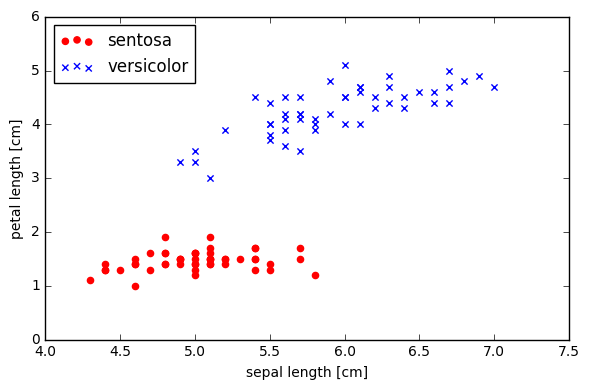

In [10]:
# plot scatter plot
plt.scatter(X[:50, 0], X[:50, 1], color='r', marker='o', label='sentosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='b', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### Train the perceptron model

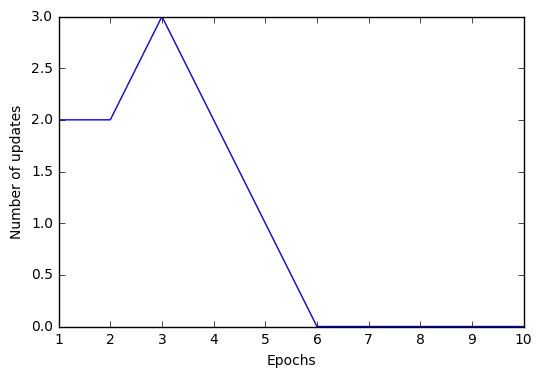

In [15]:
# Create a perceptron classifer object and train the classifier with iris data
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

# plot the error for each epoch to check for convergence
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_)
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

### Create a function for plotting decision regions

In [16]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('r', 'b', 'g', 'k', 'grey')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision regions by creating a pair of grid arrays xx1 and xx2 via meshgrid function in Numpy
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    
    # use predict method to predict the class labels z of the grid points
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    # draw the contour using matplotlib
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for i, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)

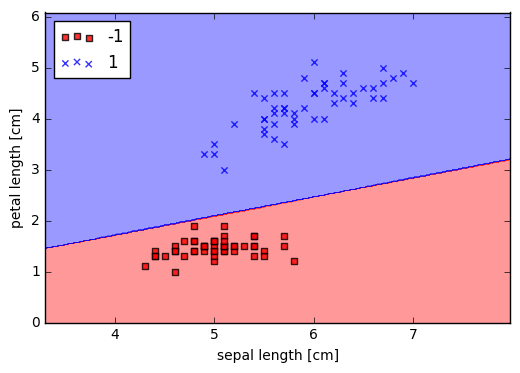

In [17]:
plot_decision_regions(X, y, ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()